Label: 6

Image pixel array:

[[  0   0   0   0   0   5   4   0   0   0  45   0   0   0   0   0   0   0   0  31   0   0   0   3   0   0   0   0]
 [  0   0   0   0   0   0   0   0  78 173 185 160  57  57  66  64  58  83 221 211 125  93   0   0   0   0   0   0]
 [  0   0   0   0   0   0  16 199 188 187 185 201 183 208 242 230 225 206 203 148 141 183 158   0   0   0   0   0]
 [  0   0   0   0   0   0 160 149 139 158 198 196 175 167 208 206 203 142 130 124 129 135 176  37   0   0   0   0]
 [  0   0   0   0   0  37 168 165 191 128 107 106 104 115 227 239 205  97 137 126 123 111 180 144   0   0   0   0]
 [  0   0   0   0   0   1 190 167 122 137 136 105  69 147 235 226 131  69 107 123 133 130 195  95   0   0   0   0]
 [  0   0   0   0   0   0 123 181 141 122 111  90  59 135 255 241 150  76 103 122 134 165 197   0   0   0   0   0]
 [  0   0   0   0   0   0   0 203 159 144 121  99  75 112 202 207 131 114 134 121 165 179 102   0   0   0   0   0]
 [  0   0   0   0   0   6   0  75 204 142 125 121 

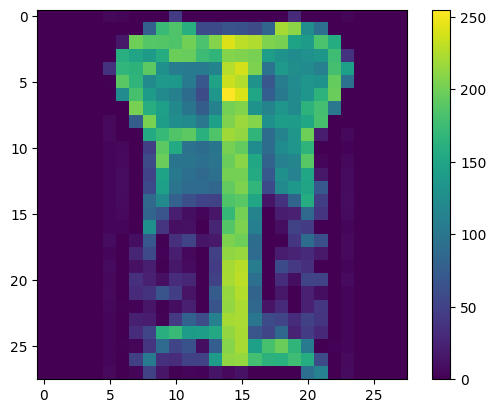

In [2]:
import mycallback
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense,Flatten,Conv2D,MaxPooling2D


fashion_mnist = tf.keras.datasets.fashion_mnist
(train_image, train_labels), (test_image, test_labels) = fashion_mnist.load_data() 

index = 127

np.set_printoptions(linewidth=320) #number of characters per row when printing

print(f'Label: {train_labels[index]}')
print(f'\nImage pixel array:\n\n{train_image[index]}\n\n')

plt.imshow(train_image[index])
plt.colorbar()
plt.show()

In [3]:
training_images = train_image/255.0
testing_images = test_image/255.0

model = Sequential([tf.keras.Input(shape=(28, 28, 1)),
                    Conv2D(64, (3, 3), activation = 'relu'),
                    MaxPooling2D(2, 2),
                    Conv2D(64, (3, 3), activation = 'relu'),
                    MaxPooling2D(2, 2),
                    Flatten(),
                    Dense(units=128, activation=tf.nn.relu),
                    Dense(units=10, activation=tf.nn.softmax)])
model.compile(optimizer= tf.optimizers.Adam(), loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, train_labels, epochs=10, callbacks=[mycallback.mycallback()])
model.evaluate(testing_images, test_labels)
model.summary()

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - accuracy: 0.7818 - loss: 0.6089
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.8859 - loss: 0.3092
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.9062 - loss: 0.2549
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.9178 - loss: 0.2192
Epoch 5/10
1874/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9278 - loss: 0.1931Loss is low so cancelling training
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.9278 - loss: 0.1931
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9038 - loss: 0.2772


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 731,360 (2.79 MB)

 Trainable params: 243,786 (952.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 487,574 (1.86 MB)

first 100 labels:

[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0 2 5 7 9 1 4 6 0 9 3 8 8 3 3 8 0 7 5 7 9 6 1 3 7 6 7 2 1 2 2 4 4 5 8 2 2 8 4 8 0 7 7 8 5 1 1 2 3 9 8 7 0 2 6 2 3 1 2 8 4 1 8 5 9 5 0 3 2 0 6 5 3 6 7 1 8 0 1 4 2]

shoes: [0, 23, 28, 39, 68, 83]


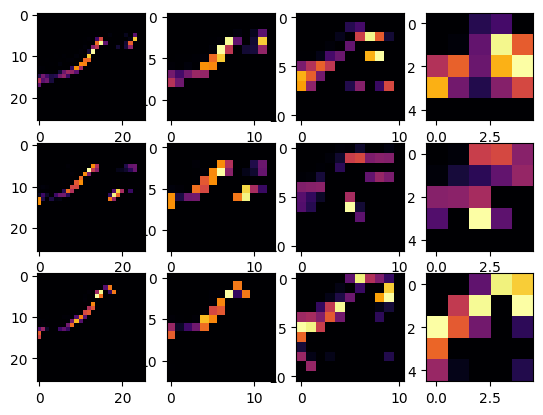

In [8]:
print(f"first 100 labels:\n\n{test_labels[:100]}")
print(f"\nshoes: {[i for i in range(100) if test_labels[0:100][i] == 9]}")

first_image = 0
second_image = 23
third_image = 28
convolution_number = 27
layers_to_visualize = [Conv2D, MaxPooling2D]

layer_outputs = [layer.output for layer in model.layers if type(layer) in layers_to_visualize]
activation_model = tf.keras.models.Model(inputs = model.inputs, outputs = layer_outputs)

f, axarr = plt.subplots(3, len(layer_outputs))

for x in range(len(layer_outputs)):
    f1 = activation_model.predict(test_image[first_image].reshape(1, 28, 28, 1), verbose=False)[x]
    axarr[0, x].imshow(f1[0, :, :, convolution_number], cmap='inferno')
    axarr[0, x].grid(False)

    f2 = activation_model.predict(test_image[second_image].reshape(1, 28, 28, 1), verbose=False)[x]
    axarr[1, x].imshow(f2[0, :, :, convolution_number], cmap='inferno')
    axarr[1, x].grid(False)

    f3 = activation_model.predict(test_image[third_image].reshape(1, 28, 28, 1), verbose=False)[x]
    axarr[2, x].imshow(f3[0, :, :, convolution_number], cmap='inferno')
    axarr[2, x].grid(False)
